# USO Investigation
_prepared on 4.22.20_


**Context:** On the big oil drop of recent, I bought the 1c in the USO N 3.5 7.5 c1x5. I made this trade prematurely (left a note to myself of learnings for what to do next time). But now holding this position, and with it under water, I wanted to better understand a good time I could look to flip my meaty atm call. 

I hypothesized that on days where USO opens higher relative to the previous day's close, you could expect a rally upon which you could sell out the meaty call more easily. 

**Goal:** The goal of this analysis is to validate whether or not we could prove that rallies occur more frequently on days where USO opens higher relative to the previous day's close. Through studying the high and close prices of each trading day relative to the open price, I hope to accomplish this goal.

Unless you would like to study the code, please skip to the `Results` section for my conclusion.

### Import libs and data

In [149]:
#Import libs
import ffn as f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import datetime as dt
from datetime import timedelta, datetime
from IPython.display import display, HTML, display_html, Markdown
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [150]:
yf.pdr_override() #hack used to access yahoo finance data for pandas data manipulation

In [151]:
#Get USO data
ticker = 'USO'
df_uso = pdr.get_data_yahoo(ticker, start = '2017-01-01', interval='d')
df_uso.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.00,11.36,11.98,11.44,36183500,11.44
2017-01-04,11.63,11.36,11.42,11.58,18067800,11.58
2017-01-05,11.79,11.51,11.69,11.70,21346700,11.70
2017-01-06,11.81,11.62,11.76,11.68,15279600,11.68
2017-01-09,11.53,11.30,11.52,11.31,20807600,11.31


### Feature Engineering

In [152]:
#Add some more columns
df_uso['Pct_Open_Change'] = round(df_uso['Open'].pct_change(),3)
df_uso['Yesterday_Close'] = df_uso['Close'].shift(1)
df_uso['Open_to_Close_Pct_Difference'] = round((df_uso['Close'] - df_uso['Open']) / df_uso['Open'],3)
df_uso['Open_to_High_Pct_Difference'] = round((df_uso['High'] - df_uso['Open']) / df_uso['Open'],3)
df_uso.head()

,High,Low,Open,Close,Volume,Adj Close,Pct_Open_Change,Yesterday_Close,Open_to_Close_Pct_Difference,Open_to_High_Pct_Difference
Date,,,,,,,,,,
2017-01-03,12.00,11.36,11.98,11.44,36183500,11.44,NaN,NaN,-0.045,0.002
2017-01-04,11.63,11.36,11.42,11.58,18067800,11.58,-0.047,11.44,0.014,0.018
2017-01-05,11.79,11.51,11.69,11.70,21346700,11.70,0.024,11.58,0.001,0.009
2017-01-06,11.81,11.62,11.76,11.68,15279600,11.68,0.006,11.70,-0.007,0.004
2017-01-09,11.53,11.30,11.52,11.31,20807600,11.31,-0.020,11.68,-0.018,0.001


In [153]:
#Adding column to identify 'Higher' vs. 'Lower' days
def conditions(dataframe):
    if (dataframe['Open'] > dataframe['Yesterday_Close']):
        return True
    else:
        return False

df_uso['is_higher_open'] = df_uso.apply(conditions, axis = 1)
df_uso.head()

,High,Low,Open,Close,Volume,Adj Close,Pct_Open_Change,Yesterday_Close,Open_to_Close_Pct_Difference,Open_to_High_Pct_Difference,is_higher_open
Date,,,,,,,,,,,
2017-01-03,12.00,11.36,11.98,11.44,36183500,11.44,NaN,NaN,-0.045,0.002,False
2017-01-04,11.63,11.36,11.42,11.58,18067800,11.58,-0.047,11.44,0.014,0.018,False
2017-01-05,11.79,11.51,11.69,11.70,21346700,11.70,0.024,11.58,0.001,0.009,True
2017-01-06,11.81,11.62,11.76,11.68,15279600,11.68,0.006,11.70,-0.007,0.004,True
2017-01-09,11.53,11.30,11.52,11.31,20807600,11.31,-0.020,11.68,-0.018,0.001,False


### Results

First, let's see what the % change of USO for each trading day has looked like since 2017. This helps give me better context on the size of the recent market move also, which is important in better understanding how/when to exit this trade.

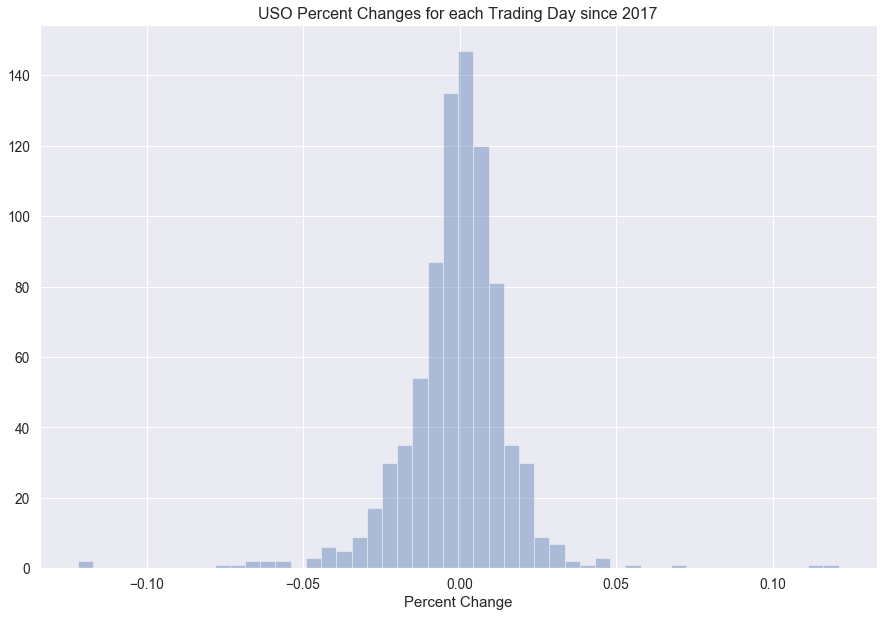

In [154]:
#What have day-to-day and open-to-close % changes looked like in these last couple years?
plt.figure(figsize = (15,10))
plt.title('USO Percent Changes for each Trading Day since 2017', fontdict= {'size':16})
sns.distplot(df_uso[1:]['Open_to_Close_Pct_Difference'], kde = False)
plt.xlabel('Percent Change');

Next, I'd like to address the main goal of this analysis. How does the % difference (Open-to-Close) on a trading day change based on whether the open is higher than the previous day's closing price?

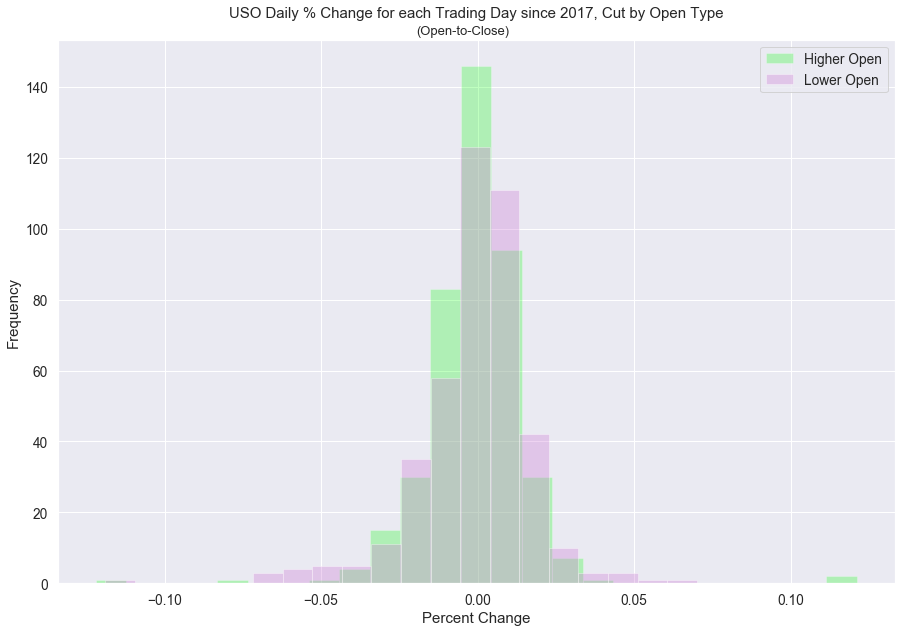

In [208]:
#Cutting the data

df_uso_higher_open = pd.DataFrame(df_uso[df_uso['is_higher_open'] == True])
df_uso_lower_open = pd.DataFrame(df_uso[df_uso['is_higher_open'] == False])
                                 
#Graph formatting
sns.set_context('paper')
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.set(font_scale=1.25)
plt.title('USO Daily % Change for each Trading Day since 2017, Cut by Open Type', y = 1.03)
plt.suptitle('(Open-to-Close)', y = 0.90, fontsize = 13)

#Building graph
ax = sns.distplot(df_uso_higher_open['Open_to_Close_Pct_Difference'], color = '#00ff00'
             ,kde = False, bins = 25, label = "Higher Open", hist_kws=dict(alpha = 0.25))

ax = sns.distplot(df_uso_lower_open['Open_to_Close_Pct_Difference'], color = '#cf82d7'
             ,kde = False, bins = 20, label = "Lower Open", hist_kws=dict(alpha = 0.35))
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

What do the summary statistics look like here?

In [174]:
#And for the summary stats
df_uso_higher_open_summary = df_uso_higher_open['Open_to_Close_Pct_Difference'].describe()
df_uso_higher_open_summary = df_uso_higher_open_summary.reset_index()
df_uso_higher_open_summary.rename(columns={'Open_to_Close_Pct_Difference':
                                           'Open-to-Close Pct Difference for Higher Open', 
                                           'index':'Summary Stats'}, 
                                           inplace=True)

df_uso_lower_open_summary = df_uso_lower_open['Open_to_Close_Pct_Difference'].describe()
df_uso_lower_open_summary = df_uso_lower_open_summary.reset_index()
df_uso_lower_open_summary.rename(columns={'Open_to_Close_Pct_Difference':
                                          'Open-to-Close Pct Difference for Lower Open', 
                                          'index':'Summary Stats'}, 
                                           inplace=True)

display('Summary Stats (Open to Close)')
display(round(pd.merge(df_uso_higher_open_summary,df_uso_lower_open_summary, on = 'Summary Stats'),2))

'Summary Stats (Open to Close)'

,Summary Stats,Open-to-Close Pct Difference for Higher Open,Open-to-Close Pct Difference for Lower Open
0,count,415.00,416.00
1,mean,-0.00,-0.00
2,std,0.02,0.02
3,min,-0.12,-0.12
4,25%,-0.01,-0.01
5,50%,0.00,0.00
6,75%,0.01,0.01
7,max,0.12,0.07


From a quick inspection of the chart and summary statistics, there does not appear to be a meaningful difference in open-to-close % change based on whether the market opens higher vs the previous day's close.

What if instead of looking at the % difference between the open and the close, we instead looked at it between the open and the day's trading high? Please find results below. 

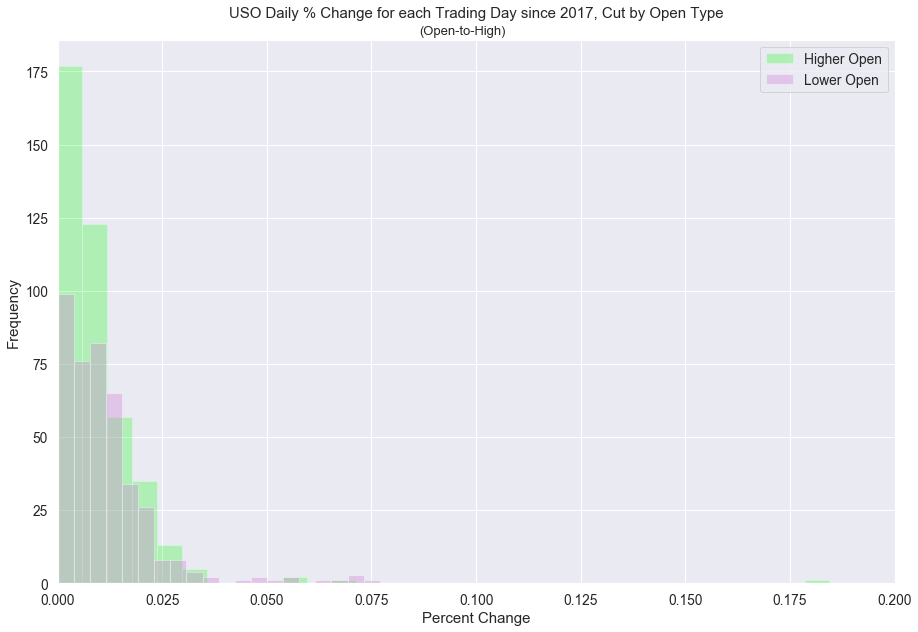

In [209]:
#Graph formatting
sns.set_context('paper')
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.set(font_scale=1.25)
plt.title('USO Daily % Change for each Trading Day since 2017, Cut by Open Type', y = 1.03)
plt.suptitle('(Open-to-High)', y = 0.90, fontsize = 13)

#Building graph
ax = sns.distplot(df_uso_higher_open['Open_to_High_Pct_Difference'], color = '#00ff00'
             ,kde = False, bins = 40, label = "Higher Open", hist_kws=dict(alpha = 0.25))

ax = sns.distplot(df_uso_lower_open['Open_to_High_Pct_Difference'], color = '#cf82d7'
             ,kde = False, bins = 20, label = "Lower Open", hist_kws=dict(alpha = 0.35))
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.xlim(0,0.2)
plt.legend()
plt.show()

While difficult to see on this graph, this data has outliers that we should not ignore. These outliers represent "Black Swan" opportunities where the payout for a volatility bet is massive. 

Let's see what the summary stats look like here.

In [192]:
#And for the summary stats
df_uso_higher_open = pd.DataFrame(df_uso[df_uso['is_higher_open'] == True]['Open_to_High_Pct_Difference'].describe())
df_uso_higher_open = df_uso_higher_open.reset_index()
df_uso_higher_open.rename(columns={'Open_to_High_Pct_Difference':'Open-to-High Pct Difference for Higher Open', 'index':'Summary Stats'}, 
               inplace=True)

df_uso_lower_open = pd.DataFrame(df_uso[df_uso['is_higher_open'] == False]['Open_to_High_Pct_Difference'].describe())
df_uso_lower_open = df_uso_lower_open.reset_index()
df_uso_lower_open.rename(columns={'Open_to_High_Pct_Difference':'Open-to-High Pct Difference for Lower Open', 'index':'Summary Stats'}, 
               inplace=True)

display('Summary Stats (Open to High)')
display(pd.merge(df_uso_higher_open,df_uso_lower_open, on = 'Summary Stats'))

'Summary Stats (Open to High)'

,Summary Stats,Open-to-High Pct Difference for Higher Open,Open-to-High Pct Difference for Lower Open
0,count,415.000000,416.000000
1,mean,0.009913,0.011298
2,std,0.016425,0.011354
3,min,0.000000,0.000000
4,25%,0.003000,0.004000
5,50%,0.007000,0.009000
6,75%,0.012000,0.015000
7,max,0.238000,0.077000


While the maximum open-to-high % change in the higher open days is greater than that for the lower open days, the graph and summary stats do not appear to show a strong difference in the data based on these two cohorts.

### Conclusion

The goal of this analysis was to validate whether or not we could prove that rallies occur more frequently on days where USO opens higher relative to the previous day's close. Looking at the daily % change disputes this; however, there do appear to be outlier rallies on higher open days when you compare the open price to the high.

This analysis is anecdotal for now, we would need to perform some statistical testing to validate whether this open-to-high percent change on higher opens is statistically significant.